Name:- Saurabh Mittal

Data Science and Business Analytics: Task #2 (Prediction using Unsupervised ML)

Problem statement: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import math 
warnings.filterwarnings("ignore")


import sklearn
from sklearn.cluster import KMeans
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Data Import

In [2]:
data  = pd.read_csv("/content/drive/My Drive/Dataset/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


# Exploratory data analysis

PairPlot

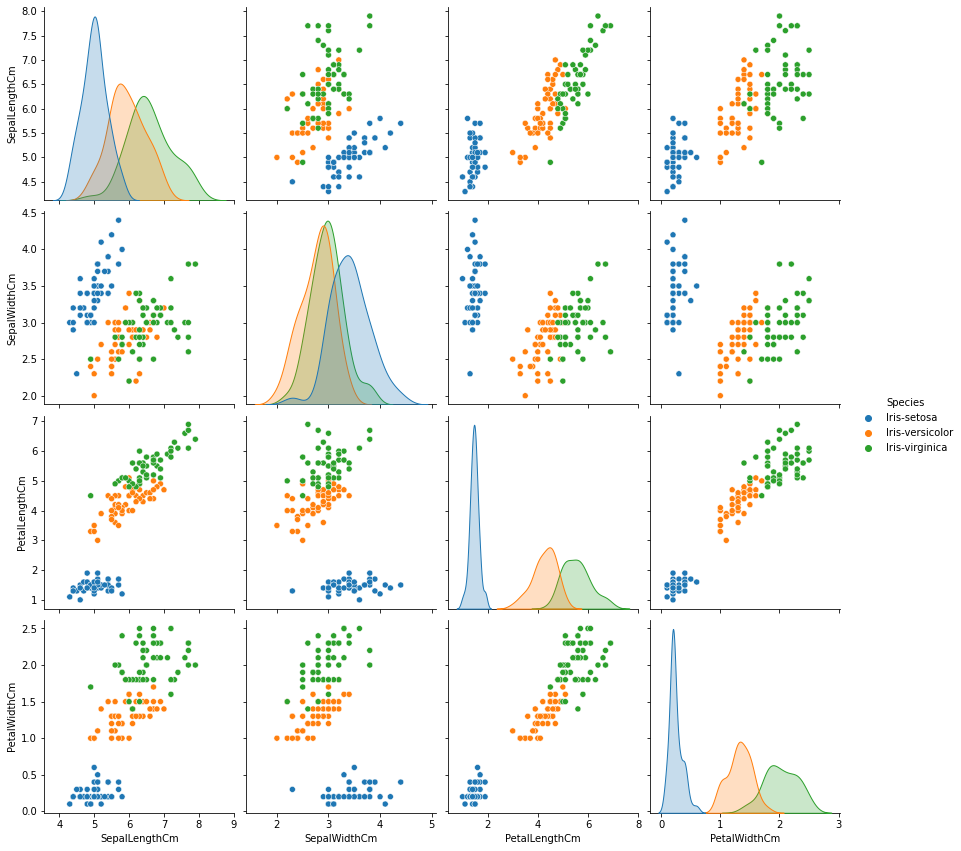

In [5]:
sns.pairplot(data.drop("Id", axis=1), hue="Species", height=3, diag_kind="kde")

FacetGrid

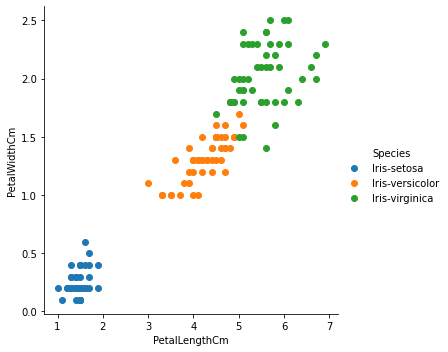

In [6]:
sns.FacetGrid(data, hue="Species", height=5).map(plt.scatter, "PetalLengthCm", "PetalWidthCm").add_legend()

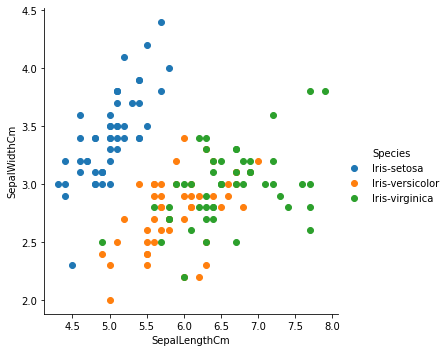

In [7]:
sns.FacetGrid(data, hue="Species", height=5).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()

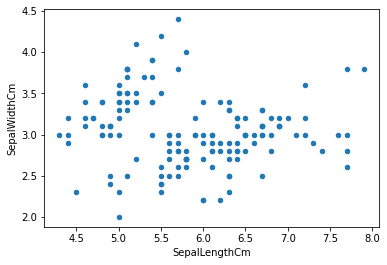

In [8]:
data.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

Correlation Heatmap

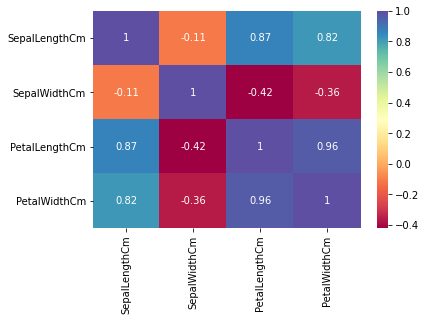

In [9]:
sns.heatmap(data.drop(['Id'], axis=1).corr(),annot=True,cmap="Spectral")
plt.show()

Boxplot

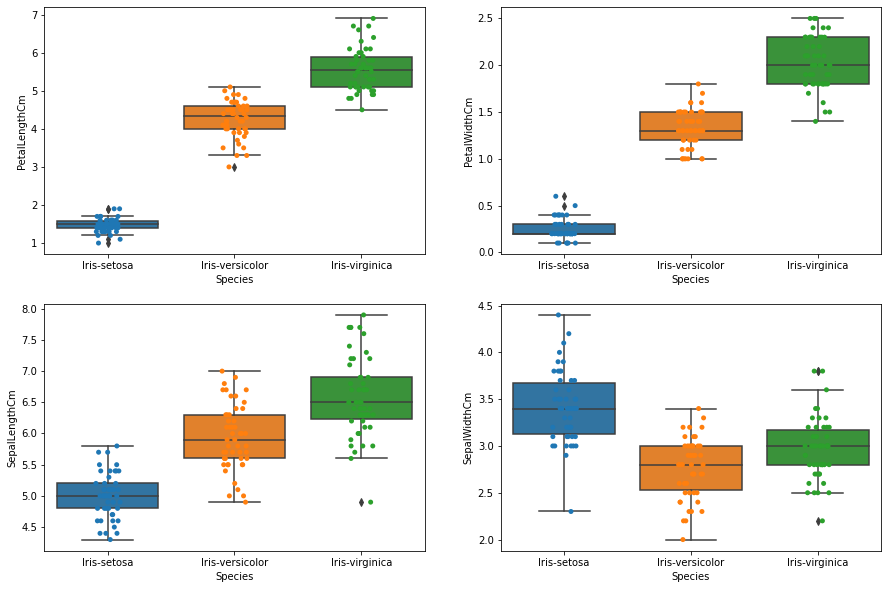

In [10]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=data)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=data, jitter=True, edgecolor="gray")

plt.subplot(2,2,2)
ax = sns.boxplot(x="Species", y="PetalWidthCm", data=data)
ax = sns.stripplot(x="Species", y="PetalWidthCm", data=data, jitter=True, edgecolor="gray")

plt.subplot(2,2,3)
ax = sns.boxplot(x="Species", y="SepalLengthCm", data=data)
ax = sns.stripplot(x="Species", y="SepalLengthCm", data=data, jitter=True, edgecolor="gray")

plt.subplot(2,2,4)
ax = sns.boxplot(x="Species", y="SepalWidthCm", data=data)
ax = sns.stripplot(x="Species", y="SepalWidthCm", data=data, jitter=True, edgecolor="gray")

ViolinPlot

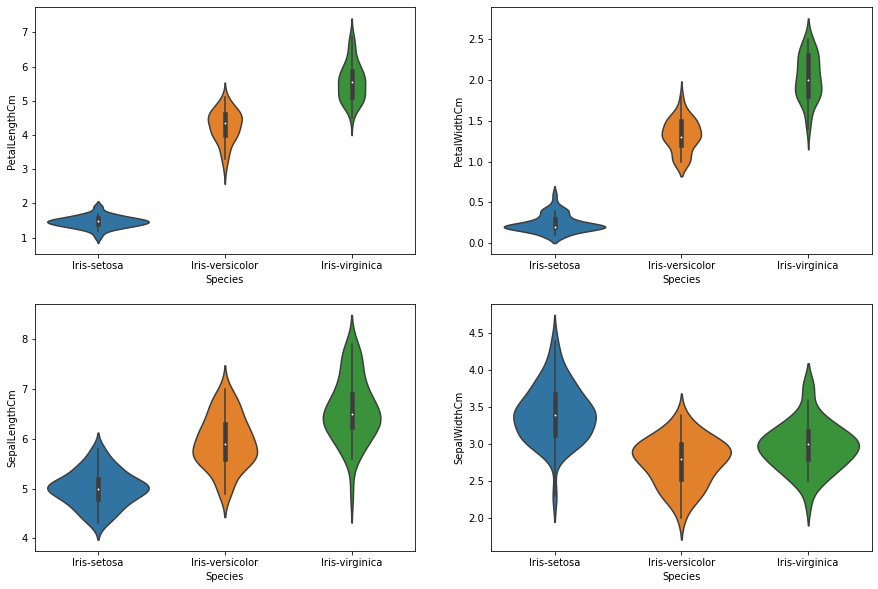

In [11]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=data)

plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=data)

plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=data)

plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=data)

In [12]:
data.drop(['Id'], axis=1, inplace=True)

In [13]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## KMeans

K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

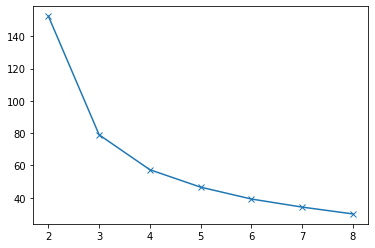

In [14]:
# Elbow-curve/SSD

new_data = data.iloc[:, [0, 1, 2,3]]
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(new_data)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(range_n_clusters,ssd, 'x-')

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [15]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(new_data)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(new_data, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.6808136202936816
For n_clusters=3, the silhouette score is 0.5525919445499757
For n_clusters=4, the silhouette score is 0.4978256901095472
For n_clusters=5, the silhouette score is 0.49285559183161204
For n_clusters=6, the silhouette score is 0.36820569682713084
For n_clusters=7, the silhouette score is 0.3460695725811892
For n_clusters=8, the silhouette score is 0.34159588763604337


In [16]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(new_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
 kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [18]:
# assign the label
new_data['Cluster_Id'] = kmeans.labels_
new_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster_Id
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


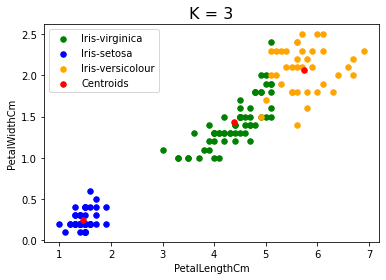

In [19]:
plt.title("K = 3",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")

plt.scatter(new_data.PetalLengthCm[new_data.Cluster_Id == 0],new_data.PetalWidthCm[new_data.Cluster_Id == 0],s = 30, c = 'green', label = 'Iris-virginica')
plt.scatter(new_data.PetalLengthCm[new_data.Cluster_Id == 1],new_data.PetalWidthCm[new_data.Cluster_Id == 1],s = 30, c = 'blue', label = 'Iris-setosa')
plt.scatter(new_data.PetalLengthCm[new_data.Cluster_Id == 2],new_data.PetalWidthCm[new_data.Cluster_Id == 2],s = 30, c = 'orange', label = 'Iris-versicolour')

plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], s = 30, c = 'red', label = 'Centroids')

plt.legend()